# Linear Algebra: Vector Spaces and Subspaces

This notebook generates visualizations for the blog post on vector spaces and subspaces.

In [2]:
import numpy as np
from scipy import linalg
from scipy.linalg import null_space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Visualize Span of Two Vectors

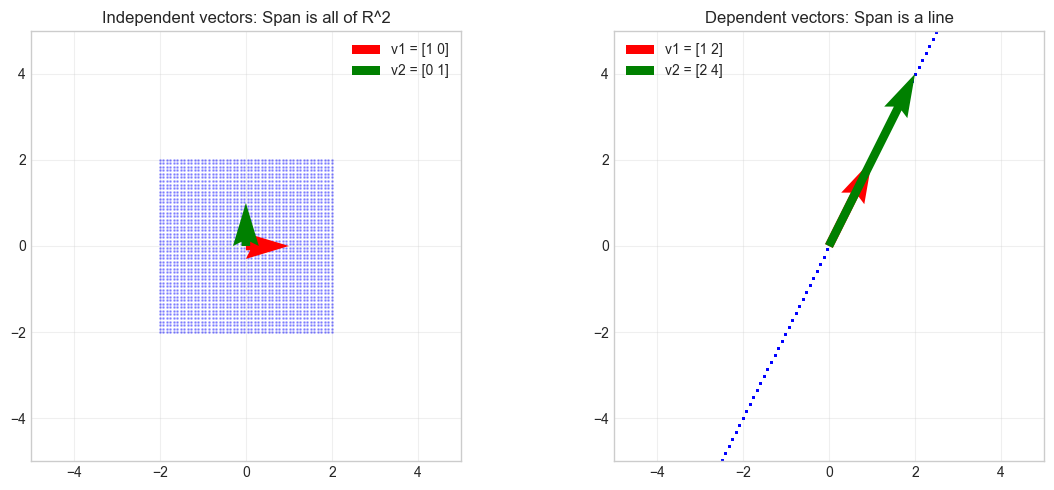

In [3]:
def plot_span_2d(v1, v2, ax, title):
    """Visualize the span of two 2D vectors."""
    # Generate random linear combinations
    t = np.linspace(-2, 2, 50)
    s = np.linspace(-2, 2, 50)
    T, S = np.meshgrid(t, s)

    # Points in the span
    X = T * v1[0] + S * v2[0]
    Y = T * v1[1] + S * v2[1]

    ax.scatter(X.flatten(), Y.flatten(), alpha=0.3, s=1, c='blue')
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
              color='red', width=0.02, label=f'v1 = {v1}')
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
              color='green', width=0.02, label=f'v2 = {v2}')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Two independent vectors span R^2
plot_span_2d(np.array([1, 0]), np.array([0, 1]), axes[0],
             'Independent vectors: Span is all of R^2')

# Two dependent vectors span a line
plot_span_2d(np.array([1, 2]), np.array([2, 4]), axes[1],
             'Dependent vectors: Span is a line')

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/span-visualization.png', dpi=150, bbox_inches='tight')
plt.show()

## Linear Independence

In [4]:
def check_linear_independence(vectors):
    """Check if a set of vectors is linearly independent."""
    A = np.column_stack(vectors)
    rank = np.linalg.matrix_rank(A)
    num_vectors = len(vectors)
    is_independent = (rank == num_vectors)
    return is_independent, rank

# Example 1: Linearly independent vectors
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
v3 = np.array([0, 0, 1])

independent, rank = check_linear_independence([v1, v2, v3])
print(f"Vectors: {v1}, {v2}, {v3}")
print(f"Linearly independent: {independent}, Rank: {rank}\n")

# Example 2: Linearly dependent vectors
w1 = np.array([1, 2, 3])
w2 = np.array([2, 4, 6])  # w2 = 2 * w1
w3 = np.array([1, 1, 1])

independent, rank = check_linear_independence([w1, w2, w3])
print(f"Vectors: {w1}, {w2}, {w3}")
print(f"Linearly independent: {independent}, Rank: {rank}")

Vectors: [1 0 0], [0 1 0], [0 0 1]
Linearly independent: True, Rank: 3

Vectors: [1 2 3], [2 4 6], [1 1 1]
Linearly independent: False, Rank: 2


## Column Space and Null Space Visualization

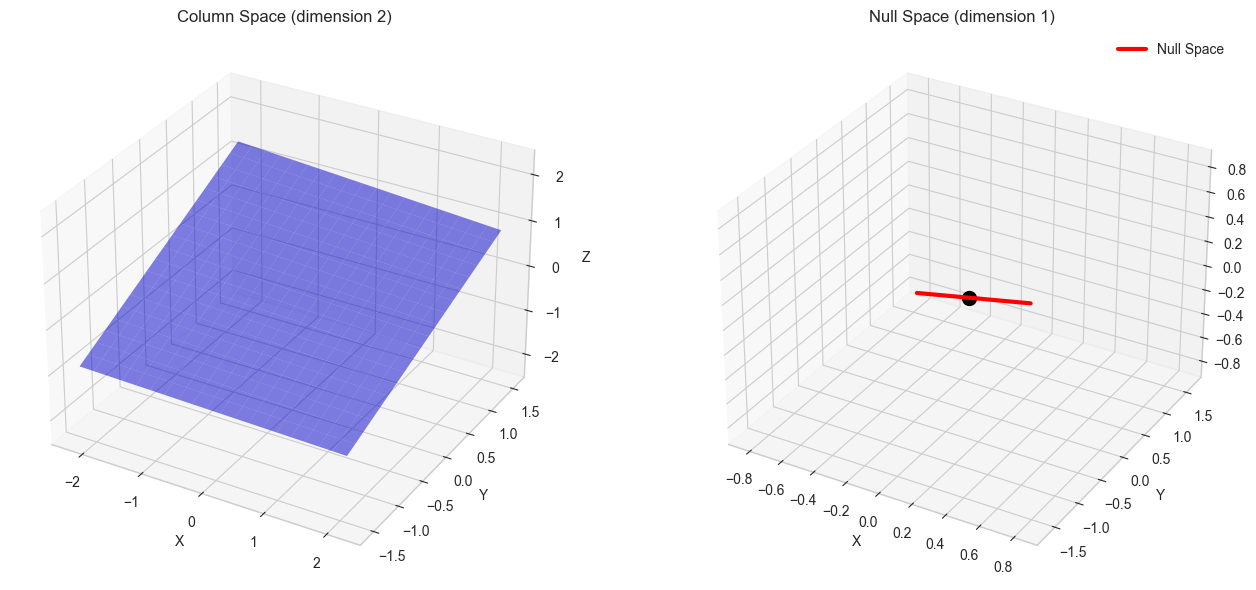

In [5]:
# Create a rank-2 matrix in R^3
C = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Get column space basis
U, s, Vt = np.linalg.svd(C)
r = np.linalg.matrix_rank(C)
col_basis = U[:, :r]

# Get null space
null_basis = null_space(C)

fig = plt.figure(figsize=(14, 6))

# Plot column space (a plane through origin)
ax1 = fig.add_subplot(121, projection='3d')
t = np.linspace(-2, 2, 20)
T, S = np.meshgrid(t, t)
X = T * col_basis[0, 0] + S * col_basis[0, 1]
Y = T * col_basis[1, 0] + S * col_basis[1, 1]
Z = T * col_basis[2, 0] + S * col_basis[2, 1]
ax1.plot_surface(X, Y, Z, alpha=0.5, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title(f'Column Space (dimension {r})')

# Plot null space (a line through origin)
ax2 = fig.add_subplot(122, projection='3d')
t = np.linspace(-2, 2, 100)
null_vec = null_basis.flatten()
ax2.plot(t * null_vec[0], t * null_vec[1], t * null_vec[2],
         'r-', linewidth=3, label='Null Space')
ax2.scatter([0], [0], [0], color='black', s=100)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title(f'Null Space (dimension {3-r})')
ax2.legend()

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/subspaces-3d.png', dpi=150, bbox_inches='tight')
plt.show()

## Fundamental Theorem Analysis

In [6]:
def analyze_matrix_spaces(A):
    """Analyze the four fundamental subspaces of a matrix."""
    m, n = A.shape
    r = np.linalg.matrix_rank(A)

    print(f"Matrix dimensions: {m} x {n}")
    print(f"Rank: {r}\n")

    print("Fundamental Subspaces:")
    print(f"  Column space:    dimension = {r} (subspace of R^{m})")
    print(f"  Null space:      dimension = {n - r} (subspace of R^{n})")
    print(f"  Row space:       dimension = {r} (subspace of R^{n})")
    print(f"  Left null space: dimension = {m - r} (subspace of R^{m})")

# Example
B = np.array([[1, 2, 3, 4],
              [2, 4, 6, 8],
              [1, 1, 1, 1]])

print(f"Matrix B:\n{B}\n")
analyze_matrix_spaces(B)

Matrix B:
[[1 2 3 4]
 [2 4 6 8]
 [1 1 1 1]]

Matrix dimensions: 3 x 4
Rank: 2

Fundamental Subspaces:
  Column space:    dimension = 2 (subspace of R^3)
  Null space:      dimension = 2 (subspace of R^4)
  Row space:       dimension = 2 (subspace of R^4)
  Left null space: dimension = 1 (subspace of R^3)
